# WoS Notebook 02:

# Metadata Analysis of Web of Science Data

This notebook uses a data file of WoS merged in the previous notebook (notebook "01").

## 0. Setup

### Import files if using Google Colab

If using Colab, uncomment out the cell below and run.

In [2]:
##Option 1:
#!wget https://git.dartmouth.edu/lib-digital-strategies/RDS/projects/bibliometrics/-/archive/main/bibliometrics-main.zip
#!unzip bibliometrics-main.zip

##Option 2:
#!git clone https://git.dartmouth.edu/lib-digital-strategies/RDS/projects/bibliometrics.git

### Import Packages

In [4]:
import sys
sys.path.insert(0, '../code')
import wos_functions

import pandas as pd 
from pathlib import Path
import collections
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

In [7]:
inputdir = Path("../data")
data = pd.read_csv(Path(inputdir, "merged_wos_rand1000.csv"), encoding = 'utf-8', index_col=[0])
data.head()

,PT,AU,AF,TI,SO,LA,DT,DE,ID,AB,...,SN,EI,BN,DI,UT,JI,PD,PY,WC,SC
17,J,"Arpawong, TE; Sun, P; Chang, MCC; Gallaher, P;...","Arpawong, Thalida Em; Sun, Ping; Chang, Megan ...",Family and Personal Protective Factors Moderat...,SUBSTANCE USE & MISUSE,English,Article,resilience; Chinese adolescents; smoking; fami...,STRESSFUL LIFE EVENTS; CIGARETTE-SMOKING; SUBS...,Tobacco use among Chinese adolescents is incre...,...,1082-6084,1532-2491,NaN,10.3109/10826081003686041,WOS:000280518600007,Subst. Use Misuse,JUL,2010.0,Substance Abuse; Psychiatry; Psychology,Substance Abuse; Psychiatry; Psychology
270,J,"Subhi, N","Subhi, N.",The potential conflict between religiosity and...,AUSTRALIAN JOURNAL OF PSYCHOLOGY,English,Meeting Abstract,NaN,NaN,NaN,...,0004-9530,NaN,NaN,NaN,WOS:000242541400710,Aust. J. Psychol.,NaN,2006.0,"Psychology, Multidisciplinary",Psychology
20,J,"van Schalkwyk, I; Wissing, MP","van Schalkwyk, Izanette; Wissing, Marie P.",Psychosocial Well-being in a Group of South Af...,JOURNAL OF PSYCHOLOGY IN AFRICA,English,Article,psychosocial well-being; flourishing; languish...,MENTAL-HEALTH-CONTINUUM; POSITIVE EMOTIONS; HA...,The aim of this study was to explore the psych...,...,1433-0237,NaN,NaN,10.1080/14330237.2010.10820342,WOS:000277209700006,J. Psychol. Afr.,NaN,2010.0,"Psychology, Multidisciplinary",Psychology
162,J,"Wang, CY; Guo, JY; Kuo, MF","Wang, Chun-yuan; Guo, Jinyun; Kuo, Ming-feng",The building of social resilience in Sichuan a...,SAFETY SCIENCE,English,Article,Social resilience; Disaster management; System...,EMERGENCY MANAGEMENT; DISASTERS; SYSTEM,"In November 2007, China implemented its Emerge...",...,0925-7535,1879-1042,NaN,10.1016/j.ssci.2020.104662,WOS:000524360700021,Saf. Sci.,JUN,2020.0,"Engineering, Industrial; Operations Research &...",Engineering; Operations Research & Management ...
493,J,"Schapira, Z; Stevens-Rumann, C; Shorrock, D; H...","Schapira, Zoe; Stevens-Rumann, Camille; Shorro...",Beetlemania: Is the bark worse than the bite? ...,FOREST ECOLOGY AND MANAGEMENT,English,Article,Disturbance ecology; Bark beetle; Wildfire; Fu...,POSTFIRE TREE REGENERATION; FIRE BEHAVIOR; CLI...,"Due to the shifting global climate, the freque...",...,0378-1127,1872-7042,NaN,10.1016/j.foreco.2020.118879,WOS:000617952600004,For. Ecol. Manage.,FEB 15,2021.0,Forestry,Forestry


## 1. Summarize Data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 17 to 157
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PT      1000 non-null   object 
 1   AU      999 non-null    object 
 2   AF      999 non-null    object 
 3   TI      1000 non-null   object 
 4   SO      1000 non-null   object 
 5   LA      992 non-null    object 
 6   DT      1000 non-null   object 
 7   DE      770 non-null    object 
 8   ID      741 non-null    object 
 9   AB      914 non-null    object 
 10  RI      488 non-null    object 
 11  OI      619 non-null    object 
 12  CR      955 non-null    object 
 13  TC      1000 non-null   float64
 14  Z9      1000 non-null   float64
 15  U1      1000 non-null   float64
 16  U2      1000 non-null   float64
 17  HC      9 non-null      object 
 18  HP      9 non-null      object 
 19  PU      992 non-null    object 
 20  SN      861 non-null    object 
 21  EI      697 non-null    object 
 22  BN   

In [9]:
data.describe()

,TC,Z9,U1,U2,PY
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,17.291000,17.869000,3.155000,24.760000,2017.112000
std,39.943683,41.861584,8.194762,48.060131,5.299957
min,0.000000,0.000000,0.000000,0.000000,1991.000000
25%,1.000000,1.000000,0.000000,3.000000,2015.000000
50%,5.000000,5.000000,1.000000,10.000000,2019.000000
75%,18.000000,18.000000,3.000000,27.000000,2021.000000
max,701.000000,749.000000,124.000000,666.000000,2023.000000


## 2. Visualize Papers over Time

In [11]:
wos_yrs = data.groupby("PY").size()
wos_yrs

PY
1991.0      2
1996.0      3
1997.0      1
1998.0      1
1999.0      5
2000.0      2
2001.0      3
2002.0      6
2003.0      3
2004.0     10
2005.0      8
2006.0      6
2007.0      6
2008.0     17
2009.0     19
2010.0     21
2011.0     23
2012.0     28
2013.0     42
2014.0     41
2015.0     48
2016.0     62
2017.0     67
2018.0     75
2019.0     78
2020.0    104
2021.0    115
2022.0    126
2023.0     78
dtype: int64

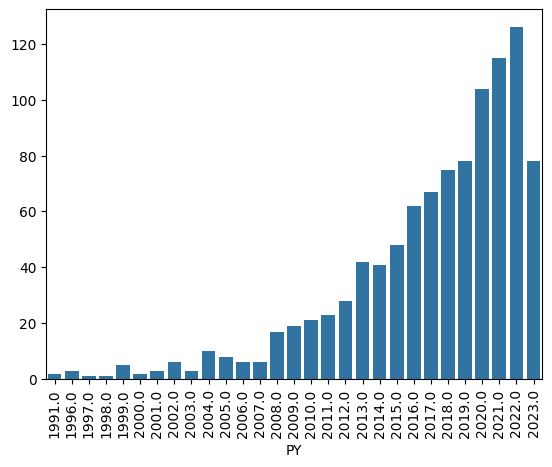

In [12]:
sns.barplot(wos_yrs)
plt.xticks(rotation=90);

## Visualize Distribution of Papers by WoS Group

## Analysis of Web of Science Groups

The Web of Science places each article or paper into at least one, and often multiple, [WoS categories](https://jcr.clarivate.com/jcr/browse-category-list) (254 total available categories). If your Web of Science dataset is narrowly focused in one discipline, then an analysis of these categories could be fruitful.

However, if the search criteria you used to create your dataset is large, then you will want to aggregate these 254 possible categories into a narrower range of groups. Fortunately, the WoS assigns each of these 254 categories into a narrower range of [21 groups](https://jcr.clarivate.com/jcr/browse-categories). Unfortunately, the WoS links many of these 254 categories with multiple groups. Thus, the aggregation of your dataset from categories to groups is not a straightforward process.

Thus, I have created the following functions that each return a new dataframe:
1. **wos_add_and_explode_groups()**: returns your original dataframe with a new column identifying the group(s) matching each paper / category
2. **wos_groupby_Groups**: a summary dataframe grouping your original data by WoS Group.



In [13]:
data_explode = wos_functions.wos_add_and_explode_groups(data)

original dataset has 1000 rows and 30 columns
exploding by wos_categ (WC) produces a df with 1782 rows and 31 columns
after adding in WoS groups and also exploding by groups, the resulting df has 2781 rows and 33 columns


In [14]:
groupsdf = wos_functions.wos_groupby_Groups(data_explode)
groupsdf.head()

,group_ct,Group,categ_ct,journal_ct,citableitem_ct,numitems_insample_per100kinWOS
18,169,Psychiatry/Psychology,16,1531,135062,125.127719
20,56,Visual & Performing Arts,10,921,47202,118.639041
6,265,Economics & Business,21,3394,240626,110.129412
19,332,"Social Sciences, General",41,6450,354940,93.536936
8,229,Environment/Ecology,13,1721,286983,79.795667


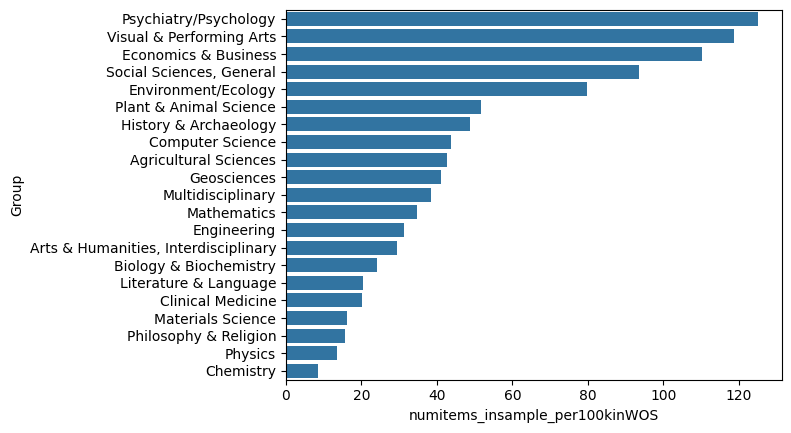

In [15]:
sns.barplot(groupsdf, y="Group", x="numitems_insample_per100kinWOS");

## Group by WoS Group *and* Year

In [16]:
data_yr_group = data_explode.groupby(["Group", "PY"])["PT"].count().reset_index(name="yr_ct")

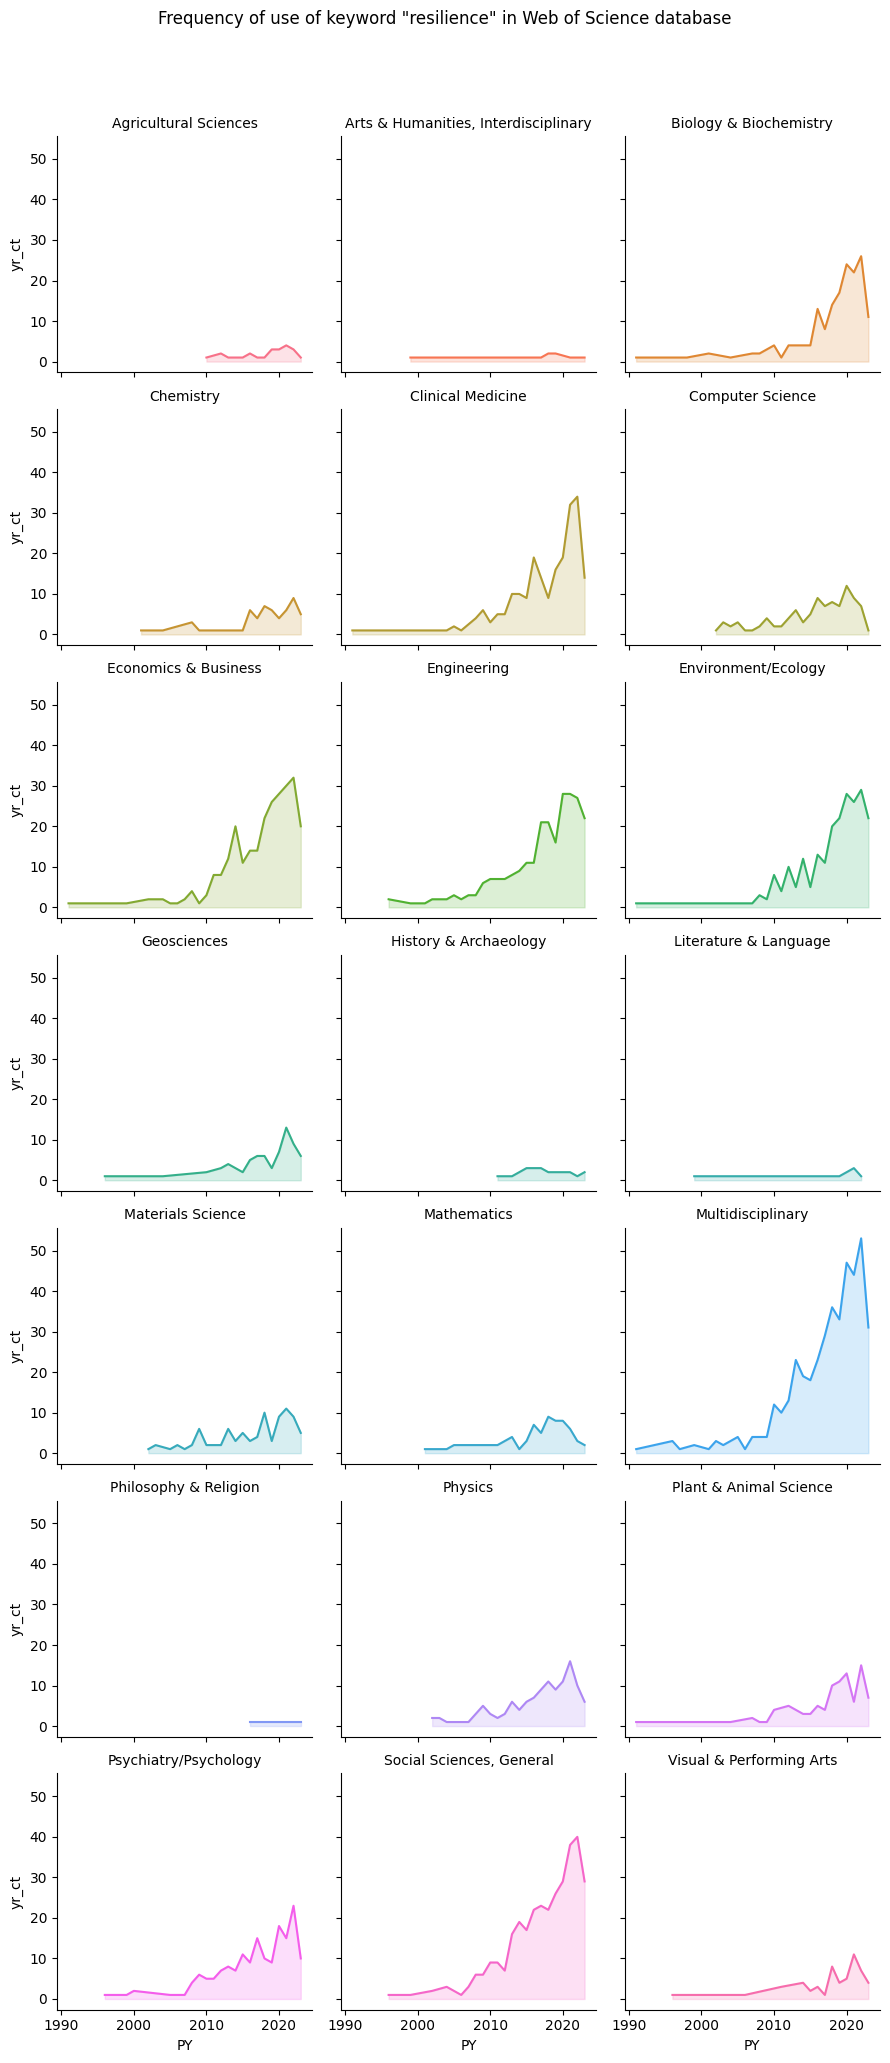

In [17]:
# code for creating the faceted grid of area graphs below is 
## adapted from: https://python-graph-gallery.com/242-area-chart-and-faceting/

# Create a grid : initialize it
g = sns.FacetGrid(data_yr_group, col="Group", hue="Group", col_wrap = 3)

# Add the line over the area with the plot function
g = g.map(plt.plot, 'PY', 'yr_ct')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'PY', 'yr_ct', alpha=0.2).set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.figure.suptitle('Frequency of use of keyword "resilience" in Web of Science database')

What can you learn from the above graphs? What changes would you want to make to more clearly discern patterns in scholarship?